# Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Importing iris dataset

In [2]:
file=pd.read_csv(r"C:\Users\kowsalya saravanan\Downloads\iris_dataset.csv")

In [3]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
file.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# Spliting into test and train data

In [6]:
x=file.iloc[:,:-1]

In [7]:
y=file.iloc[:,4]

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=5,shuffle=True)

In [9]:
print("length of train set:",len(x_train))

length of train set: 120


In [10]:
print("length of test set:",len(x_test))

length of test set: 30


In [11]:
print('shape of x test data:',x_test.shape)

shape of x test data: (30, 4)


In [12]:
print('shape of y train data:',y_train.shape)

shape of y train data: (120,)


# Fit the data into model

In [13]:
knn=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=3)

In [14]:
fitting=knn.fit(x_train,y_train)

# Predicting the test data

In [15]:
predict=knn.predict(x_test)
print(predict)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


# Accuracy score

In [16]:
accuracy=knn.score(x_train,y_train)
print("accuracy of the model:",accuracy)

accuracy of the model: 0.9833333333333333


# Plotting K value vs accuracy 

In [17]:
neighbors=np.arange(1,8)
print(neighbors)

[1 2 3 4 5 6 7]


In [18]:
list(enumerate(neighbors))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]

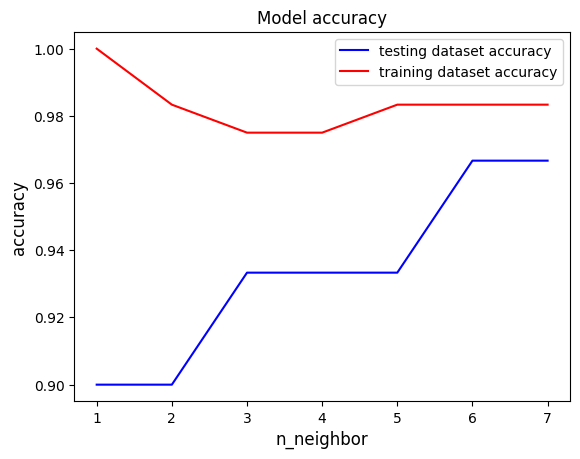

In [19]:
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors,test_accuracy,label='testing dataset accuracy',color='blue')
plt.plot(neighbors,train_accuracy,label='training dataset accuracy',color='red')
plt.legend()
plt.xlabel('n_neighbor',size=12)
plt.ylabel('accuracy',size=12)
plt.title('Model accuracy',size=12)
plt.show()

# Prediction for user input

In [20]:
def userpredict(n):
    slen=[]
    swid=[]
    plen=[]
    pwid=[]
    for i in range(0,n):
        slength=input("sepallength")
        swidth=input("sepal width")
        plength=input("petal length")
        pwidth=input("petal width")
        print("======================")
        slen.append(slength)
        swid.append(swidth)
        plen.append(plength)
        pwid.append(pwidth)
    
    data={
        "sepal length (cm)": np.array(slen),
        "sepal width (cm)":np.array(swid),
        "petal length (cm)":np.array(plen),
        "petal width (cm)":np.array(pwid),
        
    }
    df=pd.DataFrame(data)
    predicted=knn.predict(df)
    df['target']=predicted
    return df

In [22]:
userpredict(2)

sepallength 0.3
sepal width 0.4
petal length 0.5
petal width 0.6


sepallength 0.8
sepal width 0.9
petal length 0.7
petal width 0.9


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.3,0.4,0.5,0.6,Iris-setosa
1,0.8,0.9,0.7,0.9,Iris-setosa
